## 1.DATASET

In [1]:
#1. (age: age in years)                                  #category= sex, cp, fbs,restecg,exang,slope,ca, thal
#2. (sex:: 1 = male; 0 = female)

#3 (cp:: cp: chest pain type
#-- Value 1: typical angina
#-- Value 2: atypical angina
#-- Value 3: non-anginal pain
#-- Value 4: asymptomatic)

#4 (trestbps: resting blood pressure (in mm Hg on admission to the hospital))
#5 (chol: serum cholestoral in mg/dl)
#6 (fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false))

#7 (restecg: resting electrocardiographic results
#-- Value 0: normal
#-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)

#8 ( thalach: maximum heart rate achieved)
#9 (exang: exercise induced angina (1 = yes; 0 = no))
#10 (oldpeak = ST depression induced by exercise relative to rest)

#11 slope: the slope of the peak exercise ST segment
#-- Value 1: upsloping
#-- Value 2: flat
#-- Value 3: downsloping

#12 ( ca: number of major vessels (0-3) colored by flourosopy)

#13 ( thal: 3 = normal; 6 = fixed defect; 7 = reversable defect)

#14 (num) (the predicted attribute)
# diagnosis of heart disease (angiographic disease status)
#-- Value 0: < 50% diameter narrowing
#-- Value 1: > 50% diameter narrowing



### 2.DATA ACQUISTION

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:

import pandas as pd
address="C:/Users/ANTHONY/Desktop/CSV&XLSX/processed.cleveland.data"


########## using pandas
header_list = ["Age", "Sex", "cp","trestbps", "chol", "fbs","restecg", "thalach", "exang","oldpeak", "slope", "ca","thal", "presence",]
df = pd.read_csv(address, names=header_list)
df


,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1




### 3.PRE PROCESSING

In [5]:
########### data types
df.dtypes

Age         float64
Sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
presence      int64
dtype: object

In [6]:
####### conversion to numeric
dfnum = df.apply(pd.to_numeric, errors='coerce')               #numeric

# If we set the errors argument to 'coerce', Pandas will convert the column to numeric, 
#but all values that can't be converted to numeric will be changed to NaNs, that is missing values.


dfnum['presence'].mask(df['presence'] > 0, 1, inplace=True)      #replacing 1,2,3 of presence with 1
dfnum

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [7]:
### check for any missing values
dfnum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       303 non-null    float64
 1   Sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  presence  303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [8]:
############# null values
dfnum[dfnum.isnull().any(axis=1)] 
dfnum_nonull=dfnum.dropna()
dfnum_nonull

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


### 4.DATA ANALYSIS

In [9]:
##### CHECKING OUT NON CATEGORICAL TYPE FEATURES #######

#category= sex, cp, fbs,restecg,exang,slope,ca, thal

dfnum_nonull.groupby('presence')["Age","trestbps","chol","thalach","oldpeak"].mean()

<ipython-input-9-ca5b359157b1>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfnum_nonull.groupby('presence')["Age","trestbps","chol","thalach","oldpeak"].mean()


,Age,trestbps,chol,thalach,oldpeak
presence,,,,,
0,52.643750,129.175000,243.493750,158.581250,0.598750
1,56.759124,134.635036,251.854015,139.109489,1.589051


In [10]:
###### VISUALIZATION & CROSS-TABING WITH CATEGORICAL TYPE FEATURES  ########

#category= sex, cp, fbs,restecg,exang,slope,ca, thal

dfcros=pd.crosstab(dfnum_nonull.Sex,dfnum_nonull.presence)   

dfcros


presence,0,1
Sex,,
0.0,71,25
1.0,89,112


<AxesSubplot:xlabel='Sex'>

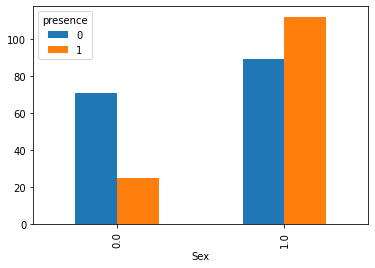

In [11]:
#more men have heart condtions compared to females
dfcros.plot(kind='bar')

<AxesSubplot:xlabel='cp'>

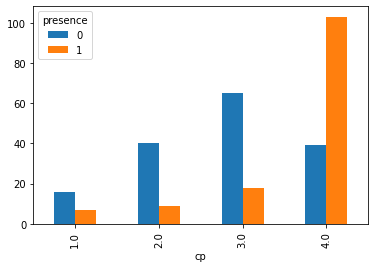

In [12]:
dfcros=pd.crosstab(dfnum_nonull.cp,dfnum_nonull.presence) 
#people with asymptomatic(4) chest pain haev higher chances of heart conditions
dfcros.plot(kind='bar')

In [13]:
dfcros=pd.crosstab(dfnum_nonull.fbs,dfnum_nonull.presence)   
#not able to make much difference in levels for people whos fasting blood sugar is less than 120 
dfcros

presence,0,1
fbs,,
0.0,137,117
1.0,23,20


<AxesSubplot:xlabel='fbs'>

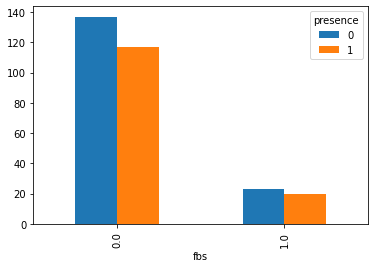

In [14]:
dfcros.plot(kind='bar')

<AxesSubplot:xlabel='slope'>

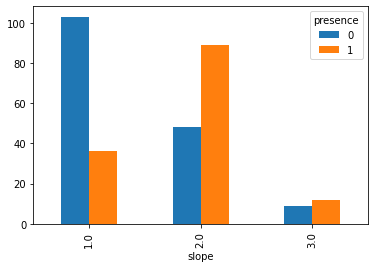

In [15]:
dfcros=pd.crosstab(dfnum_nonull.slope,dfnum_nonull.presence) 
#people with slope 1 have lesser chances of heart condition, and people with slope 2 have higher chance of heart condtition
dfcros.plot(kind='bar')

<AxesSubplot:xlabel='restecg'>

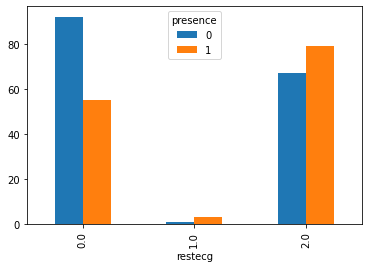

In [16]:
dfcros=pd.crosstab(dfnum_nonull.restecg,dfnum_nonull.presence) 
#people with 1 and 2 restecg have slightly higher chances of heart condtion
dfcros.plot(kind='bar')

<AxesSubplot:xlabel='exang'>

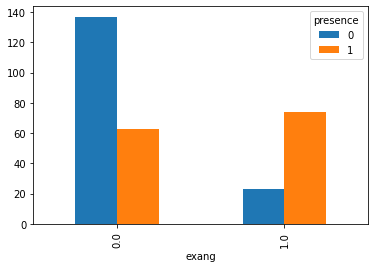

In [17]:
dfcros=pd.crosstab(dfnum_nonull.exang,dfnum_nonull.presence)   
#people with exang are more likely to get heart condtiitons 
dfcros.plot(kind='bar')

<AxesSubplot:xlabel='ca'>

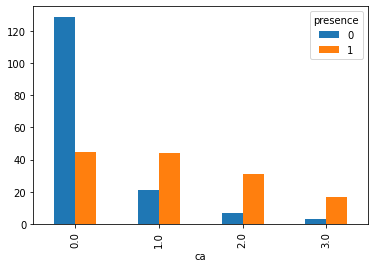

In [18]:
dfcros=pd.crosstab(dfnum_nonull.ca,dfnum_nonull.presence)   

#people with ca as zero dont have heart conftions...whereas people with 1,2,3 have heart condtions
dfcros.plot(kind='bar')

<AxesSubplot:xlabel='thal'>

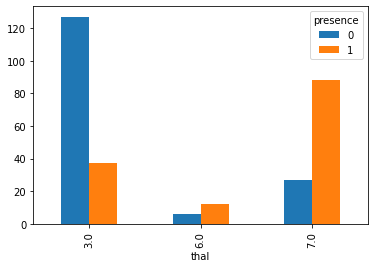

In [19]:
dfcros=pd.crosstab(dfnum_nonull.thal,dfnum_nonull.presence)   
# thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
#people with thal=7  have higher chance of heart conftions...
dfcros.plot(kind='bar')

### 5.MODELLING

In [20]:
###########################################  MODELLING ##################################################3

In [21]:
##########  SEPERATING TARGET VARIABLE AS SERIES FROM OTHER PART OF DATAFRAME   ########
y = dfnum_nonull.presence

#removing target or presence
df_nopresence_nonull=dfnum_nonull.drop(['presence'], axis = 1) 
df_nopresence_nonull

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


### LOGISTIC REGRESSION --WE ARE INPUTTING DATASET IT INTO OUR LOR MODEL


In [22]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
X=df_nopresence_nonull



In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=19)

model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred

C:\Users\ANTHONY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
###### ACCURACY
model.score(X_test,y_test)


0.9666666666666667

In [25]:
####### TESTING IT WITH AN INPUT

ip_lis=[[78,1,4,111,239,1,2,155,0,2,1,0,7]]

###### PREDICTION AND PROBABILTY OF THE PREDICTION

print(model.predict(ip_lis),model.predict_proba(ip_lis))


[0] [[0.64164793 0.35835207]]


In [26]:
######## CONFUSION MATRIX

from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)


array([[32,  1],
       [ 1, 26]], dtype=int64)

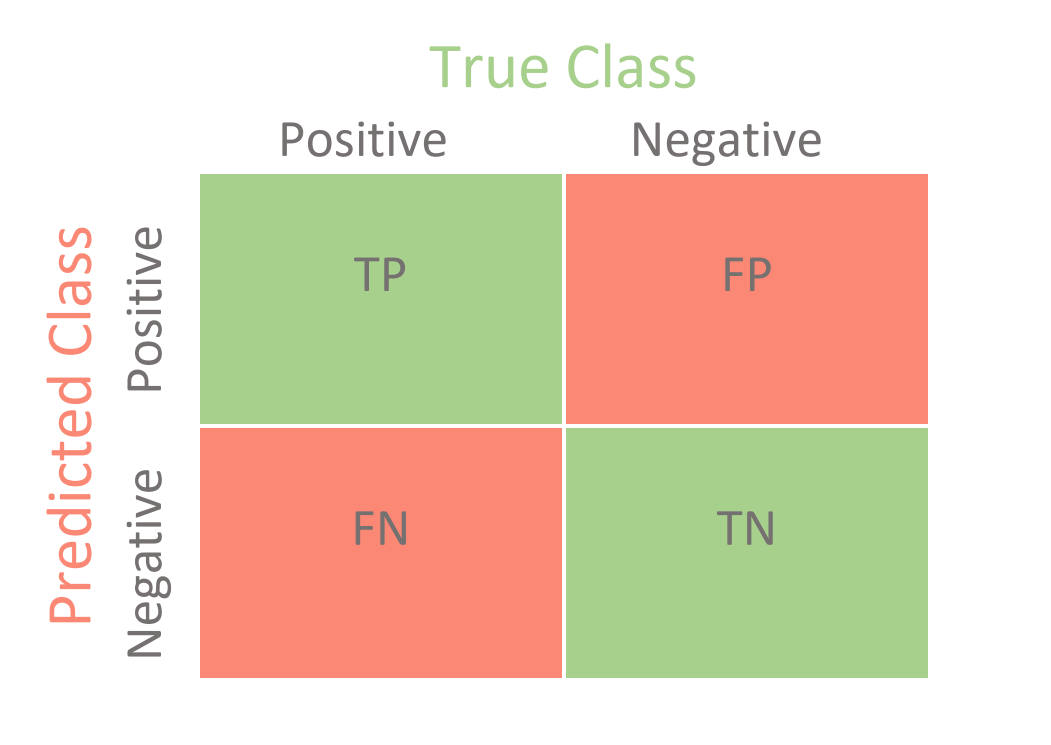

In [27]:
######### PRECISION

from sklearn.metrics import precision_score, recall_score
precision_score(y_pred,y_test)

0.9629629629629629

## FIGURING OUT WAYS TO MAKE THE MODEL BETTER

###### HOT ENCODING

MAKES n CATEGORIES INTO n FEATURES

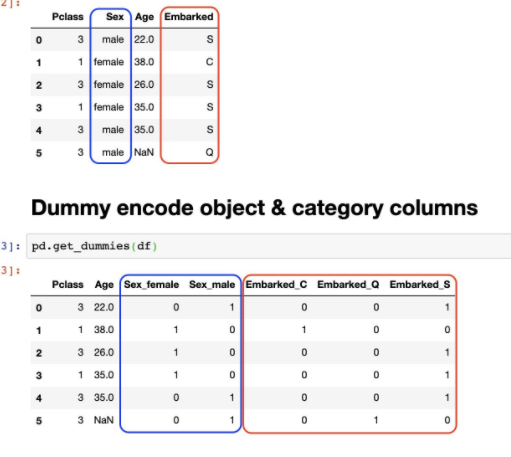

In [28]:
#categorical data
categorical_cols = ["Sex","cp","fbs","restecg","exang","slope","ca","thal"]         #not skipping fbs

#HOT ENCODING
df_dumm_nopresence_nonull = pd.get_dummies(df_nopresence_nonull, columns = categorical_cols)
df_dumm_nopresence_nonull

,Age,trestbps,chol,thalach,oldpeak,Sex_0.0,Sex_1.0,cp_1.0,cp_2.0,cp_3.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0,1,1,0,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,160.0,286.0,108.0,1.5,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,67.0,120.0,229.0,129.0,2.6,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,37.0,130.0,250.0,187.0,3.5,0,1,0,0,1,...,0,0,1,1,0,0,0,1,0,0
4,41.0,130.0,204.0,172.0,1.4,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,140.0,241.0,123.0,0.2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
298,45.0,110.0,264.0,132.0,1.2,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
299,68.0,144.0,193.0,141.0,3.4,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
300,57.0,130.0,131.0,115.0,1.2,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [29]:

X=df_dumm_nopresence_nonull
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=19)

model.fit(X_train, y_train)
y_pred=model.predict(X_test)
model.score(X_test,y_test)




C:\Users\ANTHONY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9833333333333333

In [30]:
######## CONFUSION MATRIX

from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[33,  1],
       [ 0, 26]], dtype=int64)

In [31]:
######### PRECISION

from sklearn.metrics import precision_score, recall_score
precision_score(y_pred,y_test)

0.9629629629629629

In [32]:
########### TESTTING WITH ANOTHER INPUT DATA   ##############3

In [33]:
header_list_for_pred = ["Age", "Sex", "cp","trestbps", "chol", "fbs","restecg", "thalach", "exang","oldpeak", "slope", "ca","thal"]


################## 
def forpredict(ip_lis,df_dumm_nopresence_nonull):
    ip_array = np.array(ip_lis)
    ip = ip_array.astype(np.float) 
    a_df = pd.DataFrame(data = ip,columns=header_list_for_pred)    ### make into initial df model
    df_du = pd.get_dummies(a_df, columns = categorical_cols)       ###create dummy varibales,but creates only 13 columns
    h_df_dumm_nopresence_nonull=pd.concat([df_dumm_nopresence_nonull, df_du], sort=False).fillna(0)
    h=h_df_dumm_nopresence_nonull.tail(1)                      ###create dummy variables with 28 columns
    return model.predict(h), model.predict_proba(h)

#['Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal', 'presence']
#below input will be in same format of the above column head.
ip_lis=[[78,1,4,111,239,1,2,155,0,2,1,0,7]]

r,t=forpredict(ip_lis,df_dumm_nopresence_nonull)
print("The predicted value is ",r," and probabilty are as follows",t)

The predicted value is  [0]  and probabilty are as follows [[0.61704602 0.38295398]]




## PCA- DIMENSIONALITY REDUCTION



In [34]:
############## SCALING ##################

#If you normalize your data, all variables have the same standard deviation, thus all variables have the same weight
#and your PCA calculates relevant axis.

###Ex- Lets consider age and thalach features - model may weigh thalach more than age cause its average is around 150 compared to 50 of age.

#Let’s say your data set has variables with different unit like one is in KM and another one in CM (centimeter) but both have same change in value so here for variable in KM will reflect minor change where as another one will have higher change. In this case, if we do not standardize the variable PCA will give higher preference to centimeter variable.

#In another scenario, if variables of data-set have same units of measurement and values may lie in the range of 70-130 for one variable but for other one in between 2-8 for all the records. Here PCA will give more weight to the first variable. Here standardization is required to tackle these issues.

#standardization  finds the mean of your data and centers your distribution around it,
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df_dumm_nopresence_nonull)
scaled_data=scaler.transform(df_dumm_nopresence_nonull)
scaled_data


array([[ 0.93618065,  0.75038004, -0.27644339, ..., -1.11044257,
         3.93700394, -0.79490133],
       [ 1.3789285 ,  1.59626645,  0.74455507, ...,  0.90054184,
        -0.25400025, -0.79490133],
       [ 1.3789285 , -0.65943064, -0.35349988, ..., -1.11044257,
        -0.25400025,  1.25801776],
       ...,
       [ 1.48961547,  0.69398761, -1.04700826, ..., -1.11044257,
        -0.25400025,  1.25801776],
       [ 0.27205887, -0.09550637, -2.24138382, ..., -1.11044257,
        -0.25400025,  1.25801776],
       [ 0.27205887, -0.09550637, -0.21865103, ...,  0.90054184,
        -0.25400025, -0.79490133]])

In [35]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
x_pca

array([[-1.07567578e+00,  1.68369415e+00],
       [-3.33987166e+00,  1.53136241e+00],
       [-4.18392452e+00, -1.26143418e-01],
       [ 1.71730980e+00, -1.10720027e+00],
       [ 3.11356180e+00,  8.36261039e-01],
       [ 2.93138195e+00, -1.68532802e+00],
       [-7.77207051e-01,  3.10691591e+00],
       [ 9.39703367e-01,  4.94420841e-01],
       [-2.28281806e+00, -1.84645390e-01],
       [-2.98035184e+00,  2.06685794e-01],
       [-5.98610159e-01, -1.38345278e+00],
       [ 1.45222412e+00,  2.33599546e+00],
       [-2.49552360e+00,  1.20141869e+00],
       [ 2.09075909e+00, -2.83170000e+00],
       [ 1.06302122e+00, -4.97365161e-01],
       [ 2.40378565e+00, -1.09282797e+00],
       [ 9.73913606e-01, -2.50263892e+00],
       [ 1.46652416e+00, -1.28262510e+00],
       [ 3.10818244e+00,  7.03613913e-01],
       [ 2.94832596e+00, -1.63326963e+00],
       [-1.09073635e+00,  3.28172825e-02],
       [ 1.88356922e+00,  3.52438957e+00],
       [ 8.79495179e-01,  2.96962923e-01],
       [-4.

In [36]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
X=x_pca
y = dfnum_nonull.presence

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=19)

model.fit(X_train, y_train)
y_pred=model.predict(X_test)


#############  ACCURACY

model.score(X_test,y_test)

0.9166666666666666

In [38]:
#############  CONFUSION MATRIX


from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)


array([[30,  2],
       [ 3, 25]], dtype=int64)

In [39]:
#############  PRECISION

from sklearn.metrics import precision_score, recall_score
precision_score(y_pred,y_test)

0.9259259259259259

Text(0, 0.5, 'Second principle component')

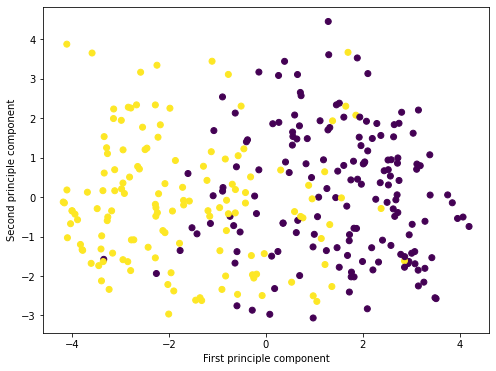

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=dfnum_nonull['presence'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

## Removing highly correlated values

In [41]:
#categorical data
categorical_cols = ["Sex","cp","fbs","restecg","exang","slope","ca","thal"]         #not skipping fbs

# HOT ENCODING AGAIN
df_dumm_nopresence_nonull = pd.get_dummies(df_nopresence_nonull, columns = categorical_cols)
df_dumm_nopresence_nonull

,Age,trestbps,chol,thalach,oldpeak,Sex_0.0,Sex_1.0,cp_1.0,cp_2.0,cp_3.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0,1,1,0,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,160.0,286.0,108.0,1.5,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,67.0,120.0,229.0,129.0,2.6,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,37.0,130.0,250.0,187.0,3.5,0,1,0,0,1,...,0,0,1,1,0,0,0,1,0,0
4,41.0,130.0,204.0,172.0,1.4,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,140.0,241.0,123.0,0.2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
298,45.0,110.0,264.0,132.0,1.2,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
299,68.0,144.0,193.0,141.0,3.4,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
300,57.0,130.0,131.0,115.0,1.2,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [42]:
correlated_features = set()
correlation_matrix = df_dumm_nopresence_nonull.corr()
correlation_matrix

,Age,trestbps,chol,thalach,oldpeak,Sex_0.0,Sex_1.0,cp_1.0,cp_2.0,cp_3.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
Age,1.000000,0.290476,0.202644,-0.394563,0.197123,0.092399,-0.092399,0.042571,-0.163227,-0.043181,...,-0.183998,0.171004,0.025612,-0.376277,0.171946,0.222475,0.159356,-0.130333,0.059732,0.103792
trestbps,0.290476,1.000000,0.131536,-0.049108,0.191243,0.066340,-0.066340,0.149921,-0.080820,-0.054825,...,-0.087677,0.025511,0.121060,-0.047292,-0.061574,0.086767,0.078892,-0.143474,0.075211,0.109624
chol,0.202644,0.131536,1.000000,-0.000075,0.038596,0.198089,-0.198089,-0.057040,-0.017678,-0.023570,...,-0.015037,0.041510,-0.051456,-0.089797,0.007881,0.052369,0.093691,0.001379,-0.099575,0.047368
thalach,-0.394563,-0.049108,-0.000075,1.000000,-0.347640,0.060496,-0.060496,0.080420,0.256120,0.160943,...,0.452458,-0.423817,-0.056541,0.293299,-0.196607,-0.056676,-0.176564,0.286684,-0.160679,-0.213956
oldpeak,0.197123,0.191243,0.038596,-0.347640,1.000000,-0.106567,0.106567,0.083559,-0.283033,-0.117376,...,-0.514262,0.312656,0.393024,-0.224689,-0.018964,0.214636,0.186832,-0.347874,0.101819,0.305253
Sex_0.0,0.092399,0.066340,0.198089,0.060496,-0.106567,1.000000,-1.000000,-0.092497,0.041925,0.115054,...,0.015447,0.010357,-0.050211,0.113376,-0.104641,0.015456,-0.070798,0.390730,-0.145368,-0.327671
Sex_1.0,-0.092399,-0.066340,-0.198089,-0.060496,0.106567,-1.000000,1.000000,0.092497,-0.041925,-0.115054,...,-0.015447,-0.010357,0.050211,-0.113376,0.104641,-0.015456,0.070798,-0.390730,0.145368,0.327671
cp_1.0,0.042571,0.149921,-0.057040,0.080420,0.083559,-0.092497,0.092497,1.000000,-0.128784,-0.180435,...,-0.044541,0.009870,0.067508,0.064580,-0.061958,0.039870,-0.077851,0.007591,0.031996,-0.023422
cp_2.0,-0.163227,-0.080820,-0.017678,0.256120,-0.283033,0.041925,-0.041925,-0.128784,1.000000,-0.276824,...,0.237566,-0.211140,-0.051832,0.152726,-0.059762,-0.088788,-0.083242,0.217866,-0.036866,-0.204351
cp_3.0,-0.043181,-0.054825,-0.023570,0.160943,-0.117376,0.115054,-0.115054,-0.180435,-0.276824,1.000000,...,0.092554,-0.079567,-0.025428,0.112324,0.033300,-0.193621,-0.017642,0.198698,-0.095292,-0.156164


In [43]:


for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print("HIGHLY CORRELATED FEATURES ARE",correlated_features) 



HIGHLY CORRELATED FEATURES ARE {'fbs_1.0', 'thal_7.0', 'slope_2.0', 'exang_1.0', 'Sex_1.0', 'restecg_2.0'}


In [44]:
################## REMOVING HIGHLY CORRELATED COLUMNS ###################
df_rem_cor = df_dumm_nopresence_nonull.drop(df_dumm_nopresence_nonull[['Sex_1.0', 'restecg_2.0', 'fbs_1.0', 'slope_2.0', 'thal_7.0', 'exang_1.0']], axis=1)
df_rem_cor

,Age,trestbps,chol,thalach,oldpeak,Sex_0.0,cp_1.0,cp_2.0,cp_3.0,cp_4.0,...,restecg_1.0,exang_0.0,slope_1.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0
0,63.0,145.0,233.0,150.0,2.3,0,1,0,0,0,...,0,1,0,1,1,0,0,0,0,1
1,67.0,160.0,286.0,108.0,1.5,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
2,67.0,120.0,229.0,129.0,2.6,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,37.0,130.0,250.0,187.0,3.5,0,0,0,1,0,...,0,1,0,1,1,0,0,0,1,0
4,41.0,130.0,204.0,172.0,1.4,1,0,1,0,0,...,0,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,140.0,241.0,123.0,0.2,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
298,45.0,110.0,264.0,132.0,1.2,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
299,68.0,144.0,193.0,141.0,3.4,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
300,57.0,130.0,131.0,115.0,1.2,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


<AxesSubplot:>

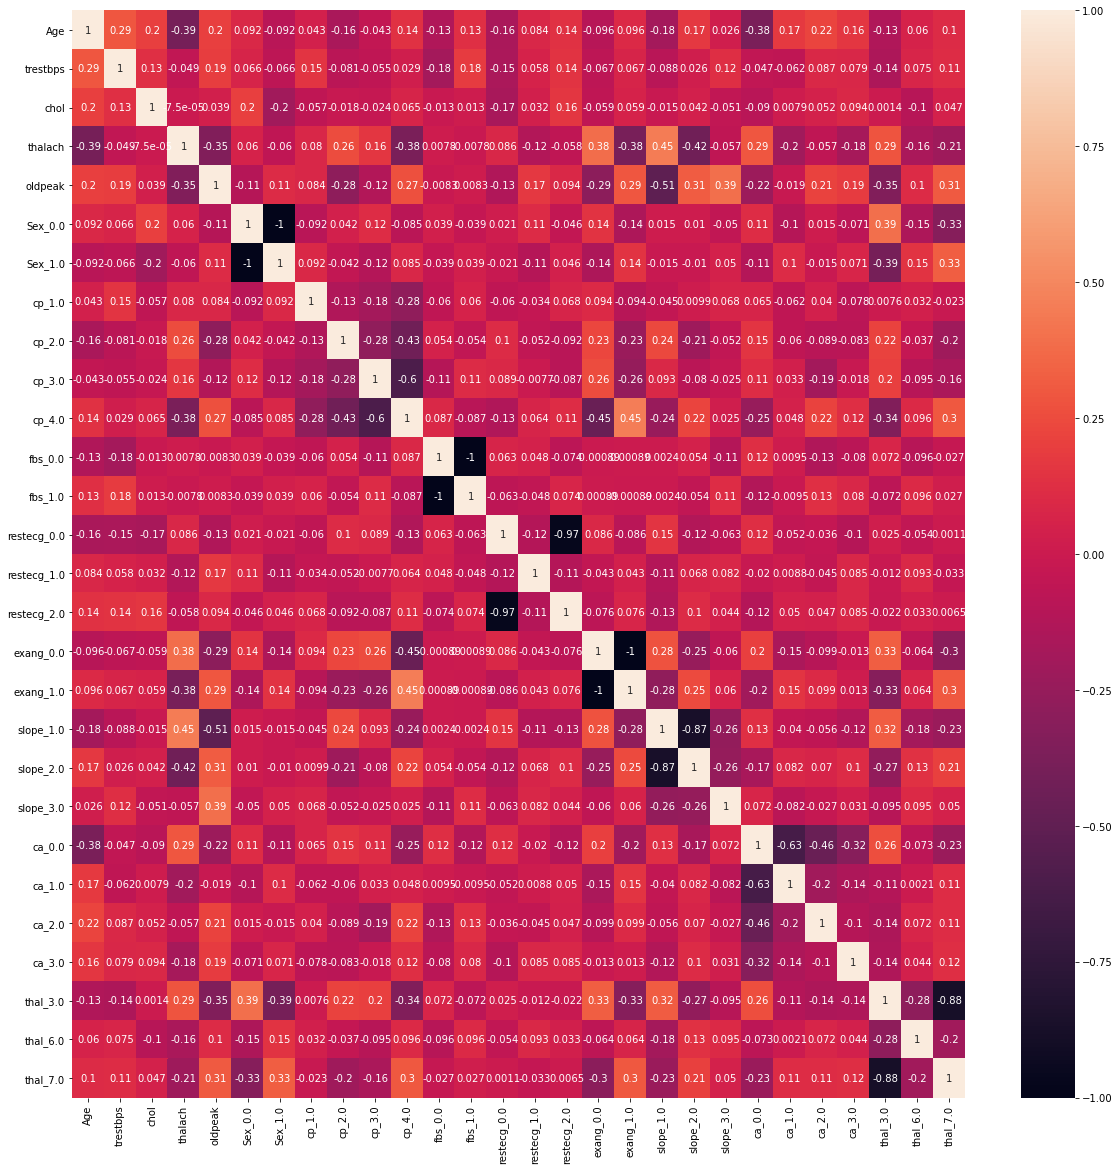

In [44]:
# Python program to generate a heatmap   
# which represents the correlation between   
# columns of panda dataframe 
  
# import required libraries 
import seaborn as sn 
  
# Defining figure size   
# for the output plot  
fig, ax = plt.subplots(figsize = (20, 20)) 
      

sn.heatmap(correlation_matrix, annot = True)

In [45]:
X=df_rem_cor
y=dfnum_nonull.presence
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=19)

model.fit(X_train, y_train)
y_pred=model.predict(X_test)
model.score(X_test,y_test)


C:\Users\ANTHONY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9833333333333333

In [46]:
#############  CONFUSION MATRIX


from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[33,  1],
       [ 0, 26]], dtype=int64)

In [47]:
#############  PRECISION

from sklearn.metrics import precision_score, recall_score
precision_score(y_pred,y_test)


0.9629629629629629

##  RFE  - RECURSIVE FEATURE ELIMINATION


In [48]:
#categorical data
categorical_cols = ["Sex","cp","fbs","restecg","exang","slope","ca","thal"]         #not skipping fbs

#df_nopresence_nonull['Sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'] = df_nopresence_nonull['Sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'].astype(int)


#df_nopresence_nonull = df_nopresence_nonull.astype(int)

#import pandas as pd
df_dumm_nopresence_nonull = pd.get_dummies(df_nopresence_nonull, columns = categorical_cols)
df_dumm_nopresence_nonull

,Age,trestbps,chol,thalach,oldpeak,Sex_0.0,Sex_1.0,cp_1.0,cp_2.0,cp_3.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0,1,1,0,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,160.0,286.0,108.0,1.5,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,67.0,120.0,229.0,129.0,2.6,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,37.0,130.0,250.0,187.0,3.5,0,1,0,0,1,...,0,0,1,1,0,0,0,1,0,0
4,41.0,130.0,204.0,172.0,1.4,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,140.0,241.0,123.0,0.2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
298,45.0,110.0,264.0,132.0,1.2,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
299,68.0,144.0,193.0,141.0,3.4,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
300,57.0,130.0,131.0,115.0,1.2,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [49]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

X = df_dumm_nopresence_nonull
target = dfnum_nonull.presence

rfecv = RFECV(estimator = LogisticRegression(), cv = 10, scoring = 'accuracy')
rfecv.fit(X, target)
rfecv.transform(X)

print('Optimal number of features: {}'.format(rfecv.n_features_))    ###### they are saying that 27 features are good

C:\Users\ANTHONY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ANTHONY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\ANTHONY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ANTHONY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\ANTHONY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ANTHONY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Optimal number of features: 27


C:\Users\ANTHONY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ANTHONY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

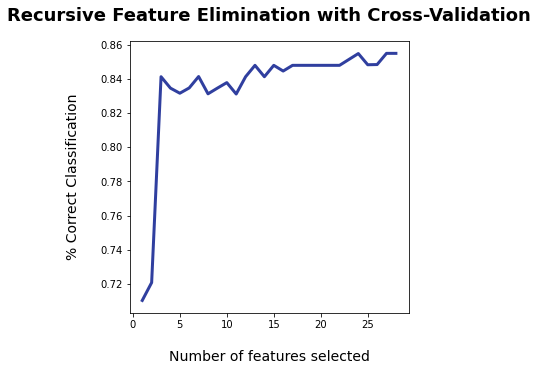

In [50]:
plt.figure(figsize=(5, 5))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

In [51]:
print(np.where(rfecv.support_ == False)[0])                                 ###### shows non-optimal features

X

[2]


,Age,trestbps,chol,thalach,oldpeak,Sex_0.0,Sex_1.0,cp_1.0,cp_2.0,cp_3.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0,1,1,0,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,160.0,286.0,108.0,1.5,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,67.0,120.0,229.0,129.0,2.6,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,37.0,130.0,250.0,187.0,3.5,0,1,0,0,1,...,0,0,1,1,0,0,0,1,0,0
4,41.0,130.0,204.0,172.0,1.4,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,140.0,241.0,123.0,0.2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
298,45.0,110.0,264.0,132.0,1.2,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
299,68.0,144.0,193.0,141.0,3.4,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
300,57.0,130.0,131.0,115.0,1.2,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [52]:
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)  ######removing non-optimal features    


In [53]:
X              #################  FROM 28 COLUMNS IT BECAME 27

,Age,trestbps,thalach,oldpeak,Sex_0.0,Sex_1.0,cp_1.0,cp_2.0,cp_3.0,cp_4.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,145.0,150.0,2.3,0,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,160.0,108.0,1.5,0,1,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
2,67.0,120.0,129.0,2.6,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,37.0,130.0,187.0,3.5,0,1,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
4,41.0,130.0,172.0,1.4,1,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,140.0,123.0,0.2,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
298,45.0,110.0,132.0,1.2,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
299,68.0,144.0,141.0,3.4,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
300,57.0,130.0,115.0,1.2,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1


In [54]:
X.columns=['Age', 'trestbps', 'thalach', 'oldpeak', 'Sex_0', 'Sex_1',
       'cp_1', 'cp_2', 'cp_3', 'cp_4', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_1', 'slope_2',
       'slope_3', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'thal_3', 'thal_6',
       'thal_7']

#df.columns = ['a', 'b']

In [55]:
X.columns

Index(['Age', 'trestbps', 'thalach', 'oldpeak', 'Sex_0', 'Sex_1', 'cp_1',
       'cp_2', 'cp_3', 'cp_4', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1',
       'restecg_2', 'exang_0', 'exang_1', 'slope_1', 'slope_2', 'slope_3',
       'ca_0', 'ca_1', 'ca_2', 'ca_3', 'thal_3', 'thal_6', 'thal_7'],
      dtype='object')

In [56]:
X

,Age,trestbps,thalach,oldpeak,Sex_0,Sex_1,cp_1,cp_2,cp_3,cp_4,...,slope_1,slope_2,slope_3,ca_0,ca_1,ca_2,ca_3,thal_3,thal_6,thal_7
0,63.0,145.0,150.0,2.3,0,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,160.0,108.0,1.5,0,1,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
2,67.0,120.0,129.0,2.6,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,37.0,130.0,187.0,3.5,0,1,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
4,41.0,130.0,172.0,1.4,1,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,140.0,123.0,0.2,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
298,45.0,110.0,132.0,1.2,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
299,68.0,144.0,141.0,3.4,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
300,57.0,130.0,115.0,1.2,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1


#### LOGISTIC REGRESSION

In [57]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [58]:
X=X
y=dfnum_nonull.presence
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=19)  

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

y_pred

C:\Users\ANTHONY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [59]:
##########  ACCURACY
model.score(X_test,y_test)

0.9833333333333333

In [60]:
##########  CONFUSION MATRIX


from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[33,  1],
       [ 0, 26]], dtype=int64)

In [61]:
##########  PRECISION

from sklearn.metrics import precision_score, recall_score
precision_score(y_pred,y_test)


0.9629629629629629

In [62]:
model

LogisticRegression()

In [66]:
import pickle
# open a file, where you ant to store the data
file = open('LOG_REG_Cleveland.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)

### TESTING WITH ANOTHER INPUT DATA


In [55]:

header_list_for_pred = ["Age", "Sex", "cp","trestbps", "chol", "fbs","restecg", "thalach", "exang","oldpeak", "slope", "ca","thal"]


In [56]:
################## 1
def forprediction(ip_lis,df_dumm_nopresence_nonull):
    ip_array = np.array(ip_lis)
    ip = ip_array.astype(np.int) 
    a_df = pd.DataFrame(data = ip,columns=header_list_for_pred)    ### make into initial df model
    df_du = pd.get_dummies(a_df, columns = categorical_cols)       ###create dummy varibales,but creates only 13 columns
    h_df_dumm_nopresence_nonull=pd.concat([df_dumm_nopresence_nonull, df_du], sort=False).fillna(0)
    h=h_df_dumm_nopresence_nonull.tail(1)###create dummy variables with 28 columns
    h.drop('chol', axis=1, inplace=True)  ### make dummy variables into 27 columns
    return model.predict(h), model.predict_proba(h)

#['Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal', 'presence']
#below input will be in same format of the above column head.
ip_lis=[[78,1,4,111,239,1,2,155,0,2,1,0,7]]
liss=[[63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0]]
r,t=forprediction(ip_lis,df_dumm_nopresence_nonull)
print("The predicted value is ",r," and probabilty are as follows",t)

The predicted value is  [0]  and probabilty are as follows [[0.57788566 0.42211434]]


C:\Users\ANTHONY\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [78]:
r

array([0], dtype=int64)

In [57]:
output=round(r[0],2)
output

0

In [58]:
if round(r[0],2) == 0:
            result = " - You do not have a heart disease"
else:
            result = "- You have a heart disease"
            
        #return render_template('page.html',prediction_texts=result)
print(result)

 - You do not have a heart disease


In [74]:
liss=[[63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0]]

r,t=forprediction(liss,df_dumm_nopresence_nonull)
print("The predicted value is ",r," and probabilty are as follows",t)


The predicted value is  [0]  and probabilty are as follows [[0.83598946 0.16401054]]


C:\Users\ANTHONY\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [75]:
ip_lis=[[75,1,1,149,210,1,2,125,0,2,1,1,3]]

r,t=forprediction(ip_lis,df_dumm_nopresence_nonull)
print("The predicted value is ",r," and probabilty are as follows",t)

The predicted value is  [1]  and probabilty are as follows [[0.398507 0.601493]]


C:\Users\ANTHONY\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [66]:
####################################################  THE END  ###############################################

In [67]:
import pickle

Age=int(input("Age: "))
trestbps=int(input("trestbps: "))
thalach=int(input("thalach: "))
oldpeak=int(input("oldpeak: "))

Sex_0=int(input("SEX: "))
if(Sex_0==0):
            Sex_0=1
            Sex_1=0
else:
            Sex_0=0
            Sex_1=1

##################
cp_1=int(input("cp_1: "))
if(cp_1==1):
            cp_1=1
            cp_2=0
            cp_3=0
            cp_4=0
elif(cp_1==2):
            cp_1=0
            cp_2=1
            cp_3=0
            cp_4=0
elif(cp_1==3):
            cp_1=0
            cp_2=0
            cp_3=1
            cp_4=0
else:
            cp_1=0
            cp_2=0
            cp_3=0
            cp_4=1        
        ##################
fbs_0=int(input("fbs_0: "))
if(fbs_0==0):
            fbs_0=1
            fbs_1=0
else:
            fbs_0=0          
            fbs_1=1   
        ##################
restecg_0=int(input("restecg_0: "))
if(restecg_0==0):
            restecg_0=1
            restecg_1=0
            restecg_2=0
elif(restecg_0==1):
            restecg_0=0
            restecg_1=1
            restecg_2=0 
else:
            restecg_0=0
            restecg_1=0
            restecg_2=1
             
       
        ##################
exang_0=int(input("exang_0: "))
if(exang_0==0):
            exang_0=1
            exang_1=0
else:
            exang_0=0
            exang_1=1          
        ##################
slope_1=int(input("slope_1: "))
if(slope_1==1):
            slope_1=1
            slope_2=0
            slope_3=0
elif(slope_1==2):
            slope_1=0
            slope_2=1
            slope_3=0 
else:
            slope_1=0
            slope_2=0
            slope_3=1
        ##################
ca_0=int(input("ca_0: "))
if(ca_0==0):
            ca_0=1
            ca_1=0
            ca_2=0
            ca_3=0
elif(ca_0==1):
            ca_0=0
            ca_1=1
            ca_2=0
            ca_3=0
elif(ca_0==2):
            ca_0=0
            ca_1=0
            ca_2=1
            ca_3=0
else:
            ca_0=0
            ca_1=0
            ca_2=0
            ca_3=1
        ##################    
thal_3=int(input("thal_3: "))
if(thal_3==3):
            thal_3=1
            thal_6=0
            thal_7=0
elif(thal_3==7):
            thal_3=0
            thal_6=1
            thal_7=0 
else:
            thal_3=0
            thal_6=0
            thal_7=1
            
model = pickle.load(open('C:/Users/ANTHONY/Desktop/important ipynb codes/REGRESSION/LOR/deploying/LOG_REG_Cleveland.pkl', 'rb'))
model

prediction=model.predict([[Age, trestbps, thalach, oldpeak, Sex_0, Sex_1, cp_1,
       cp_2, cp_3, cp_4, fbs_0, fbs_1, restecg_0, restecg_1,
       restecg_2, exang_0, exang_1, slope_1, slope_2, slope_3,
       ca_0, ca_1, ca_2, ca_3, thal_3, thal_6, thal_7]])


print(prediction)

if round(prediction[0],2) == 0:
            result = " - You do not have a heart disease"
else:
            result = "- You have a heart disease"
            
print(result)

#####  78,1,4,111,1,2,155,0,2,1,0,7

Age: 78
trestbps: 111
thalach: 155
oldpeak: 2
SEX: 1
cp_1: 4
fbs_0: 1
restecg_0: 2
exang_0: 0
slope_1: 1
ca_0: 0
thal_3: 7
[0]
 - You do not have a heart disease
